## Exploratory Data Analysis and Feature Engineering

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats 
from scipy.stats import norm
import re
warnings.filterwarnings("ignore")

In [9]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")

In [10]:
df_train.head(6)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35


In [11]:
df_test.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


In [12]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [13]:
df_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

##### Analysing sale price 

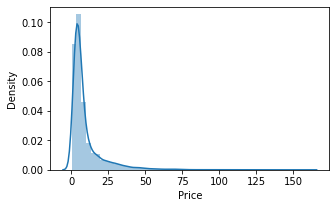

In [14]:
# Histogram
plt.figure(figsize=(5,3))
sns.distplot(df_train.Price)
# deviation from normal distribution and chances of outliers

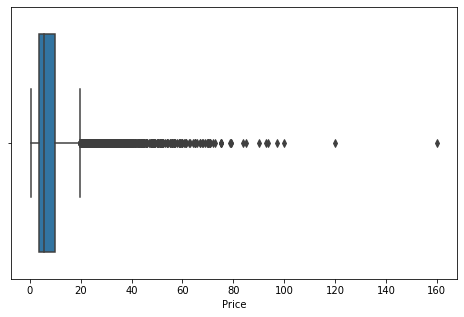

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(df_train.Price )

In [16]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())
# We are expecting a heavily tailed data with lot of outliers.

Skewness: 3.335232
Kurtosis: 17.092202


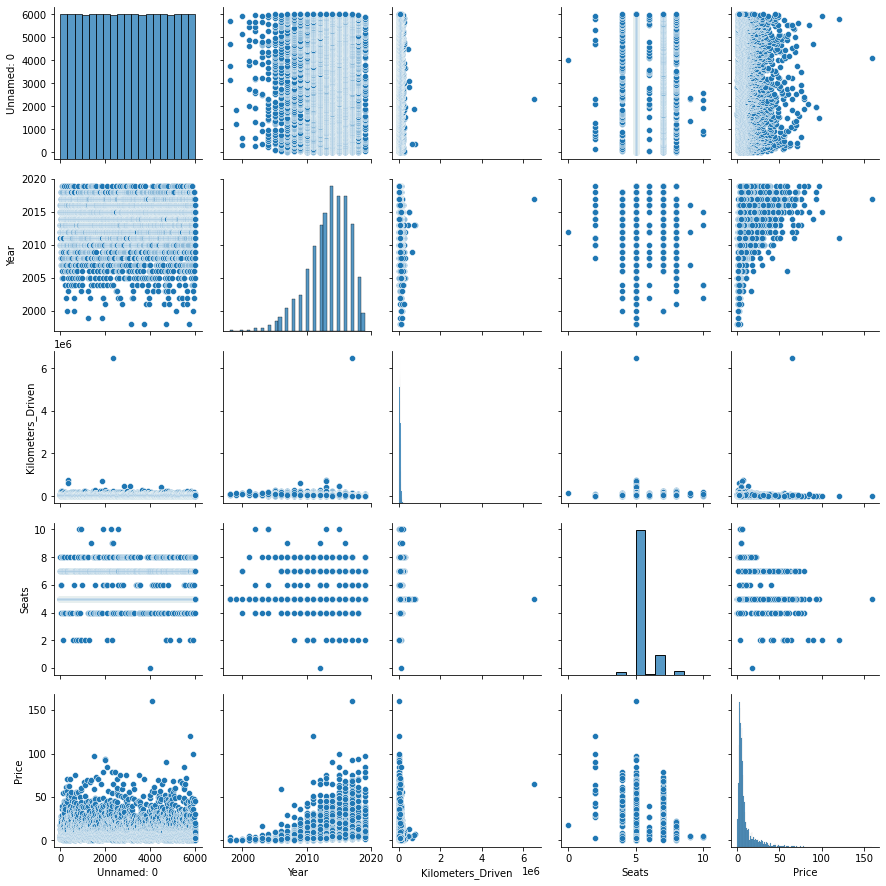

In [17]:
sns.pairplot(df_train)

##### What we have to do is a lot of groupby and specifically column wise related , 
### Feature Engineering

###### Lets treat numeric and Categorical columns seperately also some columns contain numeric values mixed up with object we need to carefully extract those features too.

In [18]:
# dropping unnamed column from both dataset
df_train = df_train.drop(['Unnamed: 0','New_Price'],axis=1)
df_test = df_test.drop(['Unnamed: 0','New_Price'],axis=1)

In [19]:
df_train.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2022,Mahindra Scorpio VLX 2WD AIRBAG BSIV,Kolkata,2013,75000,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,8.0,6.29
5768,Hyundai Creta 1.6 CRDi SX,Kochi,2017,30519,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.81
5688,Chevrolet Beat Diesel LT,Chennai,2012,75300,Diesel,Manual,Second,25.44 kmpl,936 CC,57.6 bhp,5.0,2.25
465,Hyundai Grand i10 CRDi Magna,Kolkata,2017,14000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,4.60


In [20]:
df_test.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
527,Mahindra Scorpio SLX 2.6 Turbo 8 Str,Hyderabad,2007,51000,Diesel,Manual,First,10.5 kmpl,2179 CC,120 bhp,7.0
398,Audi Q3 2012-2015 2.0 TDI Quattro Premium Plus,Mumbai,2013,75000,Diesel,Automatic,Second,15.73 kmpl,1968 CC,174.33 bhp,5.0
154,Maruti Baleno Alpha 1.2,Delhi,2016,20185,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0
853,Tata Indica Vista Aura 1.3 Quadrajet,Kolkata,2009,134000,Diesel,Manual,First,18.0 kmpl,1248 CC,75 bhp,5.0
594,Nissan Sunny 2011-2014 XL AT Special Edition,Pune,2013,66000,Petrol,Automatic,First,17.97 kmpl,1498 CC,99.6 bhp,5.0


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


#### First of all We can change object columns into numeric that are actually supposed to be numeric

In [22]:
numset = ['Mileage','Engine','Power']
dftrain_numset = df_train[numset]
dftest_numset = df_test[numset]

In [23]:
df_train[numset].columns

Index(['Mileage', 'Engine', 'Power'], dtype='object')

In [24]:
def trans_flt(df):
    for c in df.columns:
        df[c] = df[c].replace('[^\d.]','',regex=True)
        df[c] = pd.to_numeric(df[c],errors='coerce')
    return df

In [25]:
df_test[numset] = trans_flt(df_test[numset])

In [26]:
df_test.sample(6)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1083,Maruti 800 AC,Kolkata,2009,9999,Petrol,Manual,First,16.10,796.0,37.0,4.0
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,NaN,NaN,NaN
1086,Mahindra Thar CRDe,Delhi,2016,11000,Diesel,Manual,First,16.55,2498.0,105.0,6.0
359,BMW X1 xDrive 20d xLine,Coimbatore,2017,17273,Diesel,Automatic,First,20.68,1995.0,190.0,5.0
132,Maruti Ignis 1.2 Alpha,Kolkata,2017,10500,Petrol,Manual,First,20.89,1197.0,81.8,5.0
1110,Maruti Baleno Zeta 1.2,Kochi,2018,29562,Petrol,Manual,First,21.40,1197.0,83.1,5.0


In [27]:
df_train[numset] = trans_flt(df_train[numset])

In [28]:
df_train.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
506,Mercedes-Benz S Class 2005 2013 S 350 CDI,Pune,2010,137000,Diesel,Automatic,First,13.50,2987.0,282.00,5.0,18.50
1440,Renault Duster 85PS Diesel RxL Optional,Mumbai,2013,74000,Diesel,Manual,First,20.46,1461.0,83.80,5.0,5.50
2031,Toyota Innova 2.5 G (Diesel) 7 Seater,Pune,2015,100000,Diesel,Manual,Second,12.99,2494.0,100.60,7.0,10.25
5289,Renault Pulse Petrol RxL,Delhi,2016,40190,Petrol,Manual,First,18.06,1198.0,74.93,5.0,4.25


### Treating Missing values.

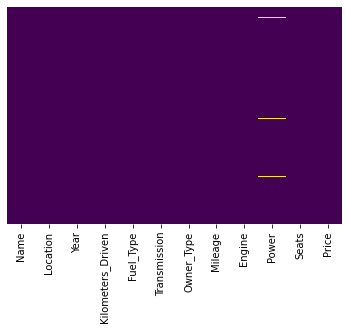

In [29]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

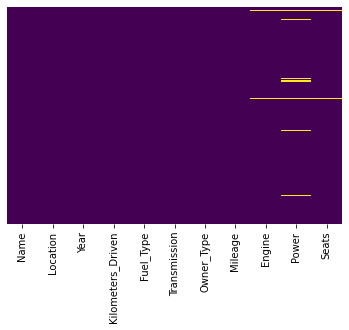

In [30]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Looks like our power,Engine,seats columns have more no.of null values.

In [31]:
# Lets have a closer look on column wise
df_train[df_train.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93


In [32]:
df_test[df_test.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,NaN,NaN,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,NaN,NaN,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,NaN,NaN,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.00,NaN,NaN,NaN
624,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
632,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.10,NaN,NaN,NaN
658,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.60,NaN,NaN,NaN
666,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.10,NaN,NaN,NaN
861,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
883,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,NaN,NaN,NaN


#### so lets impute Null values of Engine first by analysing the model column

In [33]:
tr_en_na = df_train.Engine.isnull()
tes_en_na = df_test.Engine.isnull()

In [34]:
lst = pd.to_numeric(df_train[tr_en_na]['Name'].replace('[^\d.]','',regex=True),errors='coerce')


In [35]:
df_train['NameENg'] = pd.to_numeric(df_train['Name'].replace('[^\d.]','',regex=True),errors='coerce')

In [36]:
lst1 = pd.to_numeric(df_test[tes_en_na]['Name'].replace('[^\d.]','',regex=True),errors='coerce')


In [37]:
lst.value_counts()

1.3           12
5520.0         5
1.5            3
3.0            2
20052012.0     1
1.2            1
1.4            1
Name: Name, dtype: int64

In [38]:
def impute_engine(cols):
    Engine = cols[0]
    NameENg = cols[1]
    if pd.isnull(Engine):
        if NameENg == 1.5:
            return 1500
        elif NameENg == 1.3:
            return 1300
        elif NameENg == 1.4:
            return 1400
        elif NameENg == 5520:
            return 2800
        elif NameENg == 3.0:
            return 3000
        elif NameENg == 1.2:
            return 1200
        else:
            return 1100
    else:
        return Engine

In [39]:
df_train['Engine'] = df_train[['Engine','NameENg']].apply(impute_engine,axis = 1)

In [40]:
df_train.drop('NameENg',axis=1,inplace=True)

In [41]:
df_train.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2297,Ford EcoSport 1.5 Ti VCT MT Titanium BE,Mumbai,2016,7000,Petrol,Manual,First,18.88,1499.0,110.4,5.0,6.90
1413,Audi A7 2011-2015 3.0 TDI Quattro,Mumbai,2011,42000,Diesel,Automatic,First,14.40,2967.0,241.4,5.0,28.75
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597.0,262.6,5.0,4.75
1551,Volkswagen Polo Petrol Highline 1.2L,Kolkata,2011,50000,Petrol,Manual,First,16.47,1198.0,73.9,5.0,2.35


In [42]:
### for test data
df_test['NameENg'] = pd.to_numeric(df_test['Name'].replace('[^\d.]','',regex=True),errors='coerce')

In [43]:
lst1.value_counts()

1.3       2
5520.0    2
1.4       1
1.8       1
201.4     1
3004.0    1
Name: Name, dtype: int64

In [44]:
def impute_engine_test(cols):
    Engine = cols[0]
    NameENg = cols[1]
    if pd.isnull(Engine):
        if NameENg == 1.8:
            return 1800
        elif NameENg == 1.3:
            return 1300
        elif NameENg == 1.4:
            return 1400
        elif NameENg == 201.4:
            return 1400
        elif NameENg == 3004.0:
            return 1200
        elif NameENg == 5520:
            return 2800
        elif NameENg == 1.2:
            return 1200
        else:
            return 1100
    else:
        return Engine

In [45]:
df_test['Engine'] = df_test[['Engine','NameENg']].apply(impute_engine_test,axis = 1)
df_test.drop('NameENg',axis=1,inplace=True)

#### Next Filling up seat column it doesnt much affect the sales price of car.But we can retain this feature as no.of seats  has some sort of importance in Indian car Market

## why Median?! ..Outliers...

In [46]:
#so here we can fill seats column with the median values based on the Engine capacity
#We can use of pandas "groupby" for that
df_train['Seats'].fillna(df_train.groupby('Engine').Seats.transform("median"),inplace=True)
df_test['Seats'].fillna(df_test.groupby('Engine').Seats.transform("median"),inplace=True)

In [47]:
df_train['Seats'].fillna(df_train.groupby('Price')['Seats'].transform("median"),inplace=True)

In [48]:
def med_fill(data):
    data = data.fillna(data.median())
    return data

In [49]:
df_train['Seats'] = med_fill(df_train['Seats'])
df_test.Seats = med_fill(df_test.Seats)

### Hopefully this sort of method can prevent filling up or matching up with outliers further more.   Anyway we will do the outlier detection and treatment in the later stages. We can now move on to further missing value treatment

In [50]:
## As train data frame Mileage has some null values we can also fillit with median.
df_train.Mileage = med_fill(df_train.Mileage)

In [51]:
df_train['Power'].fillna(df_train.groupby('Engine').Power.transform("median"),inplace=True)
df_test['Power'].fillna(df_test.groupby('Engine').Power.transform("median"),inplace=True)

In [52]:
#Also Power figures depend on Fuel consumption and transmission.
df_train['Power'].fillna(df_train.groupby('Mileage')['Power'].transform("median"),inplace=True)
df_test['Power'].fillna(df_test.groupby('Mileage').Power.transform("median"),inplace=True)

In [53]:
df_train['Power'] = med_fill(df_train['Power'])
df_test.Power = med_fill(df_test.Power)

In [54]:
display(df_train.isnull().sum())
print('\n')
display(df_test.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

### As Null values got filled we can futher move on to Oulier detection and its treatment

In [55]:
df_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134966,1620.866755,112.602603,5.278119,9.479468
std,3.269742,9.126884e+04,4.581528,601.700401,53.643821,0.807536,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


#### looks like 0.000 values in Mileage and seats which is not possible in any given cases for a used car so lets treat those outliers initially.

In [56]:
df_test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,18.173857,1593.799028,109.790865,5.282010
std,3.179700,35598.702098,4.464615,564.820361,51.309854,0.822366
min,1996.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.215000,1198.000000,74.925000,5.000000
50%,2014.000000,54572.500000,18.250000,1461.000000,91.100000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,126.315000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


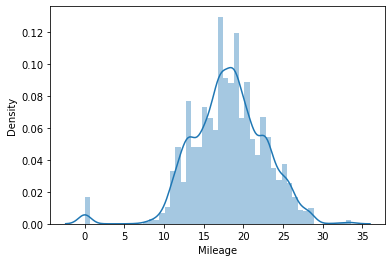

In [57]:
sns.distplot(df_train.Mileage)

###### As Mileage is connected to Engine capacity for general case in Modern cars we  can replace the value according to that

In [58]:
df_train[df_train.Mileage==0] = df_train[df_train.Mileage==0].replace({'Mileage':0},df_train.groupby('Engine')['Mileage'].median().median())

In [59]:
df_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.301492,1620.866755,112.602603,5.278119,9.479468
std,3.269742,9.126884e+04,4.168545,601.700401,53.643821,0.807536,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


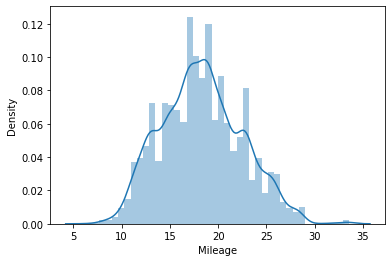

In [60]:
sns.distplot(df_train.Mileage)

In [61]:
df_test[df_test.Mileage==0] = df_test[df_test.Mileage==0].replace({'Mileage':0},df_test.groupby('Engine')['Mileage'].median().median())

In [62]:
df_test.Mileage.describe()

count    1234.000000
mean       18.333829
std         4.064357
min         7.940000
25%        15.215000
50%        18.250000
75%        21.100000
max        32.260000
Name: Mileage, dtype: float64

In [63]:
df_train[df_train.Seats==0]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,120.0,0.0,18.0


In [64]:
def impute_seat(data):
    if data == 0:
        return 5
    else:
        return data
seat_set = lambda x: impute_seat(x)

In [65]:
df_train.Seats = df_train.Seats.apply(seat_set)

#### zero value ouliers has cleared ,now we need more specific oulier treatment and category feature handling

In [66]:
df_train[(df_train.Engine<1000) & (df_train.Mileage>30)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,3.50
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,2.96
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,3.05
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,3.90
2701,Maruti Celerio CNG VXI MT,Kochi,2016,70536,CNG,Manual,First,31.79,998.0,58.33,5.0,4.58
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998.0,58.20,4.0,4.00
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,3.25
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,2.10
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,2.85


##### Here we can see most CNG vehicles which are having an engine capacity less than 1000cc shows mileage figures more than avg 0f 30. For the better performance of the model we need to readjusat those values


In [67]:
df_test[(df_test.Engine<1000) & (df_test.Mileage>30)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2,4.0
519,Maruti Alto K10 LXI CNG,Kochi,2015,47490,CNG,Manual,First,32.26,998.0,58.2,4.0
769,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26,998.0,58.2,4.0
939,Maruti Alto 800 CNG LXI,Kolkata,2013,14311,CNG,Manual,First,30.46,796.0,47.3,5.0


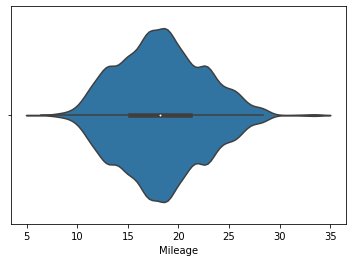

In [68]:
sns.violinplot(df_train.Mileage)

In [69]:
df_train.Mileage.describe()

count    6019.000000
mean       18.301492
std         4.168545
min         6.400000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

#### conditionally we can assert that any value in Mileage which is more than 3rd std normal value will be squished towards that 3rd normal dist. range

In [70]:

mil_outlr_adj = df_train.Mileage.mean() + 3 * df_train.Mileage.std()
mil_outlr_adj

30.807128167156517

In [71]:
df_train['Mileage'] = np.where(df_train.Mileage > mil_outlr_adj ,30,df_train.Mileage)

In [72]:
df_train.Mileage.describe()

count    6019.000000
mean       18.294919
std         4.147516
min         6.400000
25%        15.170000
50%        18.150000
75%        21.100000
max        30.460000
Name: Mileage, dtype: float64

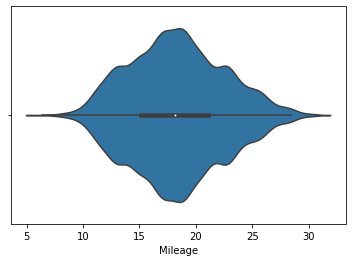

In [73]:
sns.violinplot(df_train.Mileage)

In [74]:
miltes_outlr_adj = df_test.Mileage.mean() + 3 * df_test.Mileage.std()
miltes_outlr_adj

30.52689875917077

In [75]:
df_test['Mileage'] = np.where(df_test.Mileage > miltes_outlr_adj ,30,df_test.Mileage)

count    1234.000000
mean       18.328335
std         4.047004
min         7.940000
25%        15.215000
50%        18.250000
75%        21.100000
max        30.460000
Name: Mileage, dtype: float64


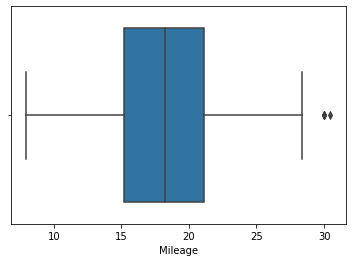

In [76]:
print(df_test.Mileage.describe())
sns.boxplot(df_test.Mileage)

In [77]:
num_feat_tr = df_train.select_dtypes(include=[np.int64,np.float64]).columns.to_list() #[:-1]
num_feat_tes = df_test.select_dtypes(include=[np.int64,np.float64]).columns.to_list()
print(num_feat_tr),print(num_feat_tes)
num_feat_tes.remove("Year")
num_feat_tes.remove('Seats') ## for now we can skip one feature Seats for model building.

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']


In [78]:
cat_cols = [feat for feat in df_train.columns if df_train[feat].dtypes=='O']
cat_cols
# cat_cols.remove('Name')

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [79]:
print(cat_cols)
print(num_feat_tes)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
['Kilometers_Driven', 'Mileage', 'Engine', 'Power']


#### seperating data into dependant and independant variables

In [80]:
df_train_fin = df_train.drop(['Seats','Price'],axis=1)
target = df_train.Price
df_test_fin = df_test.drop('Seats', axis=1)

In [97]:
X = df_train_fin.copy()
y = target.copy()
X_test = df_test_fin.copy()

### Implementing some of the preprocessing techniques like scaling ,LabelBinarizing through column_transformer and pipeline and finally applying cross_val_score and Model creation through a combined Pipeline .

In [120]:
from sklearn .preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
lbl_bin = LabelBinarizer()
ohe = OneHotEncoder(sparse=False)
std_scl = StandardScaler()


#### Regular Models. 

In [82]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [110]:
# Instantiating models.
ran_for = RandomForestRegressor(n_estimators=100,max_leaf_nodes=200,n_jobs=-1)
xgb_reg = XGBRegressor(n_estimators=50, n_jobs=-1)
svr_reg = SVR()

In [89]:
cat_transformer = Pipeline(steps=[
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))
                 ])
num_transformer = Pipeline(steps=[
                      ('std.scale',StandardScaler())
                 ])

In [93]:
column_transformer = ColumnTransformer(transformers=[
                    ("numerical",num_transformer,num_feat_tes),
                    ('categorical',cat_transformer,cat_cols)                                 
                    ],remainder='passthrough')

In [111]:
pipe_ranfor = Pipeline(steps=[('preprocessor1',column_transformer),
                              ('model1',ran_for)
                          ])

In [104]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.22,random_state=42)

In [112]:
pipe_ranfor.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor1',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('std.scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Kilometers_Driven',
                                                   'Mileage', 'Engine',
                            

In [114]:
preds = pipe_ranfor.predict(X_val)

In [118]:
score = mean_absolute_error(y_val, preds)
print('MAE:', score)

MAE: 1.7550241154710005


In [119]:
pipe_ranfor.score(X_val,y_val)

0.8777388509248255

In [123]:
### support vector Regressor model
pipe_xgb = Pipeline(steps=[('preprocessor2',column_transformer),
                              ('model2',xgb_reg)
                          ])

In [124]:
pipe_xgb.fit(X_train, y_train)
pipe_xgb.score(X_val,y_val)

[15:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8376298403723548

In [127]:
scores = cross_val_score(pipe_ranfor, X, y,
                             scoring="neg_mean_absolute_error", cv=6)
abs(scores)

array([1.82215872, 1.86193218, 1.57091167, 1.58199657, 1.79284865,
       1.83673402])

In [128]:
pipe_ranfor.score(X_val,y_val)

0.8777388509248255